# 1. Encoding Categorical Features(weights of evidence encoding )

Weights of Evidence (WoE) encoding is a technique used to transform categorical features into numerical values based on the relationship between the categories and a binary target variable (typically 0 or 1, representing "good" or "bad" outcomes, e.g., non-default vs. default, non-churn vs. churn).

How Weights of Evidence Encoding Works:

1. Calculate the Distribution of Target within Each Category: For each category in the categorical feature, calculate:

The number of "good" outcomes (target = 0).

The number of "bad" outcomes (target = 1).

The total number of observations in that category.

2. Calculate the Proportion of Good and Bad: For each category:

Proportion of Good (P_good) = (Number of good outcomes in the category) / (Total number of good outcomes in the entire dataset)

Proportion of Bad (P_bad) = (Number of bad outcomes in the category) / (Total number of bad outcomes in the entire dataset)

3. Calculate the Weights of Evidence (WoE): For each category, the WoE is calculated as the natural logarithm of the ratio of the proportion of good to the proportion of bad:

WoE = ln(P_good / P_bad)

4. Replace Categories with WoE Values: The original categorical values in the column are then replaced with their corresponding WoE values.

Handling Zero Counts:

If a category has zero occurrences of either the good or bad outcome, the proportions will be zero, leading to issues with the logarithm (ln(0) is undefined). To handle this, a small constant (e.g., 0.5 or 1) is often added to the counts of good and bad outcomes within each category before calculating the proportions. This is a form of smoothing.

Example (Men's Sports Apparel Product Type and Purchase Conversion - Binary Target):

Let's say our target variable 'Converted' is 1 if a website visit led to a purchase and 0 otherwise.

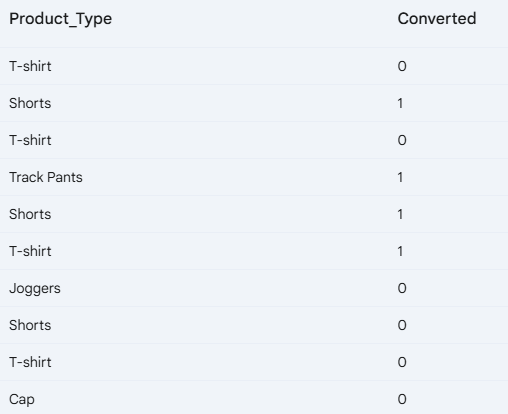

Assume total Good (Converted=0) = 6, total Bad (Converted=1) = 4.

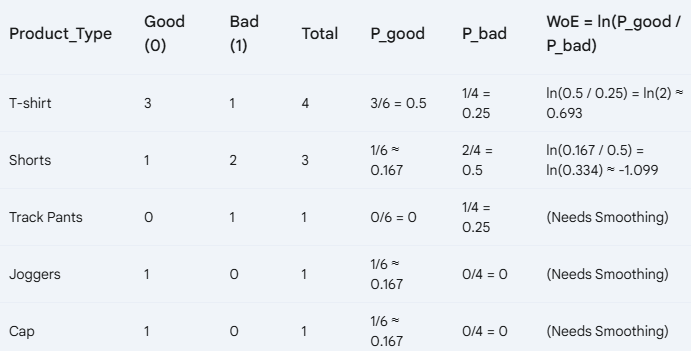

Why Use Weights of Evidence Encoding?

1. Strong Relationship with Binary Target: WoE directly reflects the predictive power of a categorical feature with respect to a binary outcome. Categories with a higher proportion of "bad" outcomes will have negative WoE, while those with a higher proportion of "good" outcomes will have positive WoE.
2. Monotonic Relationship: WoE often establishes a monotonic relationship between the categorical feature and the log-odds of the target variable. This can be beneficial for linear models like logistic regression.
3. Handles Missing Values Implicitly (to some extent): Missing values can be treated as a separate category and will get their own WoE value if they exist in the training data.
4. Variable Selection: The WoE values can be used to rank the predictive power of different categorical features.

Limitations and Considerations:

1. Requires a Binary Target Variable: WoE is specifically designed for binary classification problems.
2. Potential for Overfitting: Similar to mean encoding, if not handled carefully, WoE can lead to overfitting, especially with rare categories. Smoothing techniques (adding a constant) are crucial.
3. Information Loss: While it captures the relationship with the target, it reduces each category to a single numerical value, potentially losing some finer-grained distinctions.
4. Not Suitable for All Models: While beneficial for linear models, the monotonic transformation might not be ideal for all non-linear models.

When to Consider Weights of Evidence Encoding:

Binary Classification Problems: This is the primary application.

Feature Engineering for Logistic Regression: WoE is historically popular in credit scoring and risk modeling, where logistic regression is often used.

Variable Ranking and Selection: To understand the predictive power of categorical features.

Conclusion:

Weights of Evidence encoding is a powerful technique for transforming categorical features in binary classification problems, providing a measure of the predictive power of each category relative to the target. However, it's essential to understand its requirements (binary target), potential for overfitting, and apply appropriate smoothing techniques.

# Import necessary dependencies

In [95]:
import pandas as pd
import numpy as np

# Create the Utility functions

In [96]:
def woe_encode(categorical_feature, target, df):
    """
    Performs Weights of Evidence (WoE) encoding for a categorical feature.

    Args:
        categorical_feature (str): The name of the categorical column.
        target (str): The name of the binary target column (0 or 1).
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.Series: The WoE encoded values for the categorical feature.
    """
    df_woe = df.groupby(categorical_feature)[target].agg(['sum', 'count'])
    df_woe['good'] = df_woe['count'] - df_woe['sum']
    total_good = df[target].value_counts().get(0, 0)
    total_bad = df[target].value_counts().get(1, 0)

    # Add a small constant for smoothing to avoid division by zero and log of zero
    epsilon = 1e-6

    df_woe['bad_prop'] = (df_woe['sum'] + epsilon) / (total_bad + epsilon)
    df_woe['good_prop'] = (df_woe['good'] + epsilon) / (total_good + epsilon)
    df_woe['woe'] = np.log(df_woe['good_prop'] / df_woe['bad_prop'])
    woe_mapping = df_woe['woe'].to_dict()
    return df[categorical_feature].map(woe_mapping)

In [97]:

def get_woe_mapping(categorical_feature, target, df):
    df_woe = df.groupby(categorical_feature)[target].agg(['sum', 'count'])
    df_woe['good'] = df_woe['count'] - df_woe['sum']
    total_good = df[target].value_counts().get(0, 0)
    total_bad = df[target].value_counts().get(1, 0)
    epsilon = 1e-6
    df_woe['bad_prop'] = (df_woe['sum'] + epsilon) / (total_bad + epsilon)
    df_woe['good_prop'] = (df_woe['good'] + epsilon) / (total_good + epsilon)
    df_woe['woe'] = np.log(df_woe['good_prop'] / df_woe['bad_prop'])
    return df_woe['woe'].to_dict()

# Create sample dataset

In [98]:
# Sample DataFrame with a categorical feature ('Product_Type') and a binary target ('Purchased')
data = pd.DataFrame({
    'Product_Type': ['T-shirt', 'Shorts', 'T-shirt', 'Track Pants', 'Shorts',
                     'T-shirt', 'Joggers', 'Shorts', 'T-shirt', 'Cap',
                     'Cap', 'Track Pants'],
    'Purchased': [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1],
    'Color': ['Red', 'Blue', 'Red', 'Black', 'Blue', 'White', 'Black', 'Blue', 'Red', 'Green', 'Green', 'Black']
})

print("Original Data:")
data

Original Data:


,Product_Type,Purchased,Color
0,T-shirt,0,Red
1,Shorts,1,Blue
2,T-shirt,0,Red
3,Track Pants,1,Black
4,Shorts,1,Blue
5,T-shirt,1,White
6,Joggers,0,Black
7,Shorts,0,Blue
8,T-shirt,0,Red
9,Cap,0,Green


# Categorical Features(WOE encoding) implementation

In [99]:
# Encode 'Product_Type' using WoE

data['Product_Type_WoE'] = woe_encode('Product_Type', 'Purchased', data)
print("\nData with Weights of Evidence Encoding for Product_Type:")
data


Data with Weights of Evidence Encoding for Product_Type:


,Product_Type,Purchased,Color,Product_Type_WoE
0,T-shirt,0,Red,1.098612
1,Shorts,1,Blue,-0.693147
2,T-shirt,0,Red,1.098612
3,Track Pants,1,Black,-14.508658
4,Shorts,1,Blue,-0.693147
5,T-shirt,1,White,1.098612
6,Joggers,0,Black,13.815512
7,Shorts,0,Blue,-0.693147
8,T-shirt,0,Red,1.098612
9,Cap,0,Green,0.000000


In [100]:
# Encode 'Color' using WoE

data['Color_WoE'] = woe_encode('Color', 'Purchased', data)
print("\nData with Weights of Evidence Encoding for Color:")
data


Data with Weights of Evidence Encoding for Color:


,Product_Type,Purchased,Color,Product_Type_WoE,Color_WoE
0,T-shirt,0,Red,1.098612,14.914123
1,Shorts,1,Blue,-0.693147,-0.693147
2,T-shirt,0,Red,1.098612,14.914123
3,Track Pants,1,Black,-14.508658,-0.693147
4,Shorts,1,Blue,-0.693147,-0.693147
5,T-shirt,1,White,1.098612,-13.815512
6,Joggers,0,Black,13.815512,-0.693147
7,Shorts,0,Blue,-0.693147,-0.693147
8,T-shirt,0,Red,1.098612,14.914123
9,Cap,0,Green,0.000000,0.000000


In [101]:
# inspect the WoE mapping for each feature

product_type_woe_mapping = get_woe_mapping('Product_Type', 'Purchased', data)
print("\nWoE Mapping for Product_Type:")
product_type_woe_mapping


WoE Mapping for Product_Type:


{'Cap': 0.0,
 'Joggers': 13.815511557963774,
 'Shorts': -0.6931466805603202,
 'T-shirt': 1.0986116220018876,
 'Track Pants': -14.508658238524095}

In [102]:
# inspect the WoE mapping for each feature

color_woe_mapping = get_woe_mapping('Color', 'Purchased', data)
print("\nWoE Mapping for Color:")
print(color_woe_mapping)


WoE Mapping for Color:
{'Black': -0.6931466805603202, 'Blue': -0.6931466805603202, 'Green': 0.0, 'Red': 14.914123179965662, 'White': -13.815511557963774}


1. Interpreting WoE Values:

A positive WoE value for a category indicates that the proportion of "good" outcomes is higher than the proportion of "bad" outcomes for that category.

A negative WoE value indicates that the proportion of "bad" outcomes is higher.

A WoE value close to zero suggests that the category has a similar proportion of "good" and "bad" outcomes as the overall dataset.

2. Important Considerations for Real-World Applications:

Binary Target: WoE encoding is specifically designed for binary target variables.

Smoothing: The epsilon value helps with smoothing, especially for categories with few observations. You might need to adjust this value based on your data.

Overfitting: Be mindful of overfitting, especially with categories that have very few data points. Techniques like adding a larger smoothing factor or using cross-validation to calculate WoE can help mitigate this.

Data Leakage: Ensure that you calculate the WoE mapping only on your training data and then apply that mapping to your test and validation sets to avoid data leakage.